# **Decision Trees**

# **Introduction**

## **Methods**

In this section of my project, I am focusing on the application of machine learning to predict the FDA medical device approval categories for companies, based on their financial data. My dataset includes public company financials from balance sheets, and my goal is to predict the 'advisory_committee_description' category for FDA approvals.

I will use Python and the scikit-learn library for this task. My main tools will be decision trees and Random Forest algorithms. Decision trees are useful for breaking down a dataset into smaller subsets while at the same time developing an associated decision tree. The end result is a tree with decision nodes and leaf nodes, which is easy to understand and interpret.

To enhance the model’s accuracy and handle the complexity of financial data, I will also use the Random Forest algorithm. This method works by building numerous decision trees and merging them together to get a more accurate and stable prediction. It's particularly good for dealing with large datasets and can reduce the risk of overfitting.

Considering the potential imbalance in the dataset, I will implement the SMOTE technique from scikit-learn's imbalanced-learn package. This will help balance the dataset by increasing the number of instances from the under-represented categories in the data.

Finally, to ensure the best model performance, I will utilize GridSearchCV for hyperparameter tuning. This process involves trying out different combinations of parameters to find the most effective ones for our model.

This project aims to provide insights into how a company’s financial health might influence its classification in the FDA's medical device approval process. I hypothesize that companies with strong R&D budgets, top line revenue, and strong profitablity will tend to more likely apply for devices in specific advisory committee categories (more profitable industries/device spaces). I also hypothesize that companies with weaker financials will tend to apply for devices in other advisory committee categories (less profitable devices).

# **Data Selection**

## **Loading Data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../data-exploration/outputs/model_normalized.csv')

In [4]:
df

,device_name,SEC_name,state,CIK,financial_year,advisory_committee_description,clearance_type,ConsolidatedRevenue,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic
0,TRUSS THORACOLUMBAR PLATE SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2009.0,Orthopedic,Special,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
1,ZYFUSE FACET FIXATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2009.0,Unknown,Traditional,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
2,XTEND ANTERIOR CERVICAL PLATE SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2009.0,Orthopedic,Traditional,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
3,MODIFICATION TO BEACON STABILIZATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2009.0,Orthopedic,Special,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
4,CORRIDOR FIXATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2009.0,Unknown,Traditional,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,FemaSeed Intratubal Insemination,Femasys Inc.,GA,1339005,2023.0,Obstetrics/Gynecology,Traditional,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
719,Venus Versa PRO System,Venus Concept Inc.,CA,1409269,2023.0,"General, Plastic Surgery",Special,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
720,Ulna Plating System,BIOMET INC,IN,351346,2016.0,Orthopedic,Traditional,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
721,AbbVie PEG,AbbVie Inc.,IL,1551152,2015.0,"Gastroenterology, Urology",Traditional,1.316360e+00,1.638768,0.993608,1.349973,0.719299,1.540321,1.589212e+00,0.620365,0.117582


In [5]:
df["advisory_committee_description"].value_counts()

advisory_committee_description
Cardiovascular               128
General, Plastic Surgery      87
Gastroenterology, Urology     86
Microbiology                  83
Orthopedic                    78
General Hospital              77
Clinical Chemistry            41
Radiology                     28
Neurology                     24
Obstetrics/Gynecology         17
Anesthesiology                12
Unknown                       12
Dental                        10
Hematology                     8
Ear, Nose, Throat              7
Ophthalmic                     7
Immunology                     6
Clinical Toxicology            6
Physical Medicine              5
Pathology                      1
Name: count, dtype: int64

## **Selecting Data**

In [6]:
# Calculate value counts for the advisory_committee_description column
value_counts = df['advisory_committee_description'].value_counts()

# Filter out the values where counts are 10 or more
values_to_keep = value_counts[value_counts >= 10].index

# Keep rows in the DataFrame where advisory_committee_description is in values_to_keep
filtered_data = df[df['advisory_committee_description'].isin(values_to_keep)]


In [7]:
from sklearn.model_selection import train_test_split

# Selecting financial columns and the target variable
financial_columns = [
    'CostOfGoodsAndServicesSold', 'GrossProfit', 'OperatingExpenses',
    'ResearchAndDevelopmentExpense', 'SellingGeneralAndAdministrativeExpense',
    'OperatingIncomeLoss', 'NetIncomeLoss', 'EarningsPerShareBasic',
    'ConsolidatedRevenue'
]
target_column = 'advisory_committee_description'

# Creating a new DataFrame with only the relevant columns
data_selected = filtered_data[financial_columns + [target_column]].dropna()

# Check for missing values
missing_values = data_selected.isnull().sum()

# Splitting the data into training and testing sets
X = data_selected[financial_columns]
y = data_selected[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

missing_values, X_train.shape, X_test.shape

(CostOfGoodsAndServicesSold                0
 GrossProfit                               0
 OperatingExpenses                         0
 ResearchAndDevelopmentExpense             0
 SellingGeneralAndAdministrativeExpense    0
 OperatingIncomeLoss                       0
 NetIncomeLoss                             0
 EarningsPerShareBasic                     0
 ConsolidatedRevenue                       0
 advisory_committee_description            0
 dtype: int64,
 (478, 9),
 (205, 9))

# **Model Implementation**

## **Random Classifier**

In [8]:
import random
from collections import Counter
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_recall_fscore_support

def generate_label_data(class_labels, weights,N=10000):
    #e.g. class_labels=[0,1]  weights=[0.2,0.8] (should sum to one)

    y=random.choices(class_labels, weights = weights, k = N)
    print("-----GENERATING DATA-----")
    print("unique entries:",Counter(y).keys())  
    print("count of labels:",Counter(y).values()) # counts the elements' frequency
    print("probability of labels:",np.fromiter(Counter(y).values(), dtype=float)/len(y)) # counts the elements' frequency
    return y

#TEST

y = y.astype('category')
cats= y.cat.categories
codes = y.cat.codes

gen = generate_label_data(list(range(len(cats))), y.value_counts(normalize=True).values, y.count())

-----GENERATING DATA-----
unique entries: dict_keys([2, 5, 3, 9, 4, 1, 11, 0, 12, 10, 6, 8, 7])
count of labels: dict_values([70, 74, 89, 25, 85, 92, 10, 123, 13, 14, 44, 23, 21])
probability of labels: [0.10248902 0.10834553 0.13030747 0.03660322 0.12445095 0.13469985
 0.01464129 0.18008785 0.01903367 0.0204978  0.06442167 0.03367496
 0.03074671]


In [9]:
## RANDOM CLASSIFIER 
from sklearn.metrics import classification_report

def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    #print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    #print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    #print("accuracy",accuracy_score(y_data, ypred))
    #print("percision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))

    return accuracy_score(y_data, ypred), classification_report(y_data, ypred)

acc, mat = random_classifier(gen)

print("Accuracy:", round(100*acc, 3), "%")
print(mat)

-----RANDOM CLASSIFIER-----
Accuracy: 7.613 %
              precision    recall  f1-score   support

           0       0.26      0.11      0.16       123
           1       0.09      0.07      0.07        92
           2       0.12      0.10      0.11        70
           3       0.11      0.07      0.08        89
           4       0.05      0.02      0.03        85
           5       0.06      0.04      0.05        74
           6       0.13      0.16      0.14        44
           7       0.02      0.05      0.03        21
           8       0.00      0.00      0.00        23
           9       0.02      0.04      0.02        25
          10       0.00      0.00      0.00        14
          11       0.02      0.10      0.03        10
          12       0.07      0.31      0.12        13

    accuracy                           0.08       683
   macro avg       0.07      0.08      0.07       683
weighted avg       0.11      0.08      0.08       683



## **Basic Decision Tree Classifier**

### **Hyperparameter Tuning**

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning via grid search
parameters = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

### **Running Optimized Model**

In [11]:
# Implementing DT with optimal hyperparameters
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'])
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
dt_report = classification_report(y_test, y_pred_dt)

/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Results**

                           precision    recall  f1-score   support

           Anesthesiology       0.00      0.00      0.00         4
           Cardiovascular       0.32      0.73      0.45        37
       Clinical Chemistry       0.50      0.09      0.15        11
                   Dental       0.00      0.00      0.00         4
Gastroenterology, Urology       0.70      0.73      0.71        22
         General Hospital       0.39      0.60      0.47        20
 General, Plastic Surgery       0.21      0.29      0.25        24
             Microbiology       0.83      0.45      0.59        33
                Neurology       0.00      0.00      0.00         8
    Obstetrics/Gynecology       0.50      0.25      0.33         4
               Orthopedic       0.80      0.15      0.26        26
                Radiology       0.83      0.56      0.67         9
                  Unknown       0.00      0.00      0.00         3

                 accuracy                           0.43    

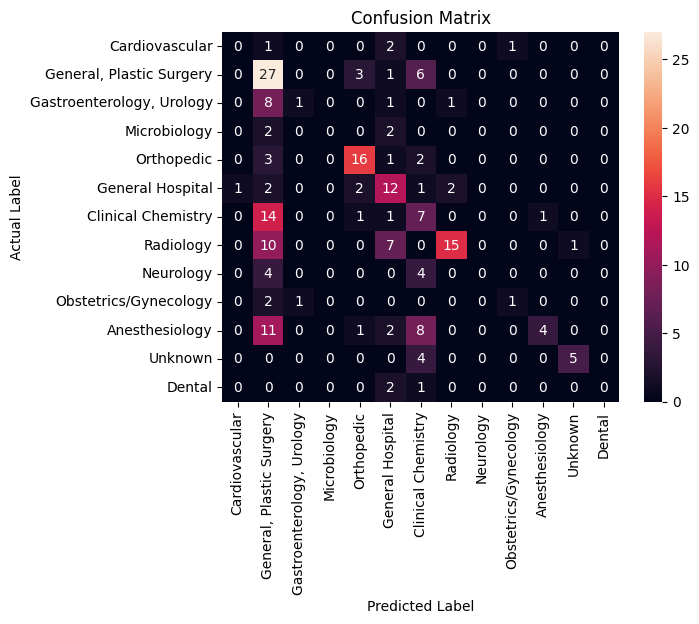

In [12]:
from sklearn.metrics import confusion_matrix

print(dt_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', xticklabels= values_to_keep, yticklabels=values_to_keep)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## **Basic Random Forest Classifier**

### **Hyperparameter Tuning**

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning 
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

### **Running Optimized Model**

In [14]:
# Implementing RF
rf_classifier = RandomForestClassifier(random_state=42, max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       n_estimators=best_params['n_estimators'])
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf)

/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Results**

                           precision    recall  f1-score   support

           Anesthesiology       0.00      0.00      0.00         4
           Cardiovascular       0.31      0.70      0.43        37
       Clinical Chemistry       0.00      0.00      0.00        11
                   Dental       0.00      0.00      0.00         4
Gastroenterology, Urology       0.67      0.73      0.70        22
         General Hospital       0.52      0.70      0.60        20
 General, Plastic Surgery       0.36      0.38      0.37        24
             Microbiology       0.86      0.55      0.67        33
                Neurology       1.00      0.38      0.55         8
    Obstetrics/Gynecology       0.50      0.50      0.50         4
               Orthopedic       0.90      0.35      0.50        26
                Radiology       1.00      0.78      0.88         9
                  Unknown       1.00      0.33      0.50         3

                 accuracy                           0.51    

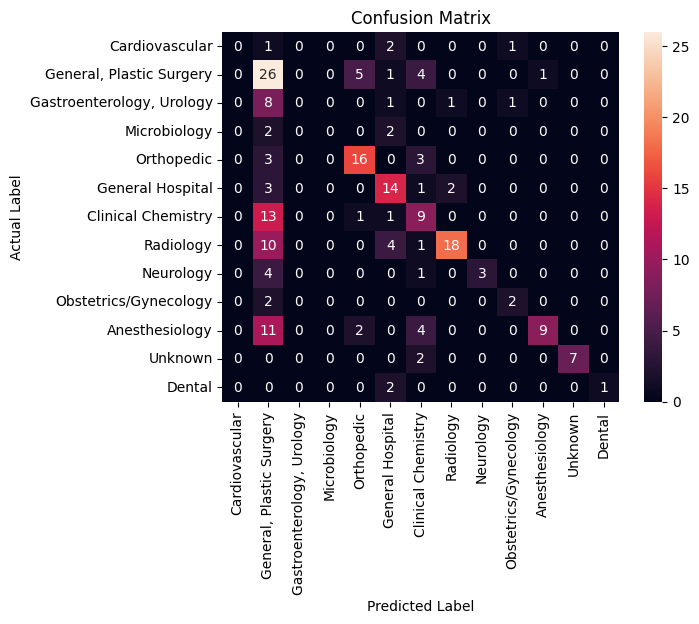

In [15]:
# Results
print(rf_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', xticklabels= values_to_keep, yticklabels=values_to_keep)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

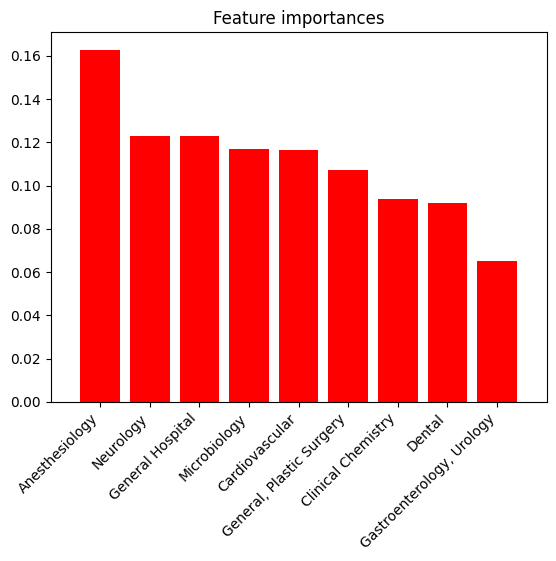

[0.16274082 0.11633879 0.09370653 0.09210023 0.06532726 0.1228902
 0.1070293  0.11696757 0.1228993 ]


In [16]:
feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names_sorted = [y.cat.categories[i] for i in indices]


plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names_sorted, rotation=45, ha= 'right')
plt.xlim([-1, X_train.shape[1]])
plt.show()

print(feature_importances)

## **Decision Tree with SMOTE**

### **Applying SMOTE**

In [17]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE for class rebalancing
smote = SMOTE(k_neighbors= 5, random_state= 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### **Hyperparameter Tuning**

In [18]:
# Hyperparameter tuning via grid search
parameters = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

### **Running Optimized Model**

In [19]:
# Implementing DT with optimal hyperparameters
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'])
dt_classifier.fit(X_train_smote, y_train_smote)

y_pred_dt = dt_classifier.predict(X_test)
dt_report = classification_report(y_test, y_pred_dt)


/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Results**

In [20]:
# Viewing results
print(dt_report)

                           precision    recall  f1-score   support

           Anesthesiology       0.00      0.00      0.00         4
           Cardiovascular       0.56      0.14      0.22        37
       Clinical Chemistry       0.12      0.82      0.22        11
                   Dental       0.00      0.00      0.00         4
Gastroenterology, Urology       0.59      0.59      0.59        22
         General Hospital       0.34      0.55      0.42        20
 General, Plastic Surgery       0.50      0.33      0.40        24
             Microbiology       0.84      0.48      0.62        33
                Neurology       0.75      0.38      0.50         8
    Obstetrics/Gynecology       0.25      0.25      0.25         4
               Orthopedic       0.92      0.42      0.58        26
                Radiology       1.00      0.78      0.88         9
                  Unknown       0.33      0.33      0.33         3

                 accuracy                           0.41    

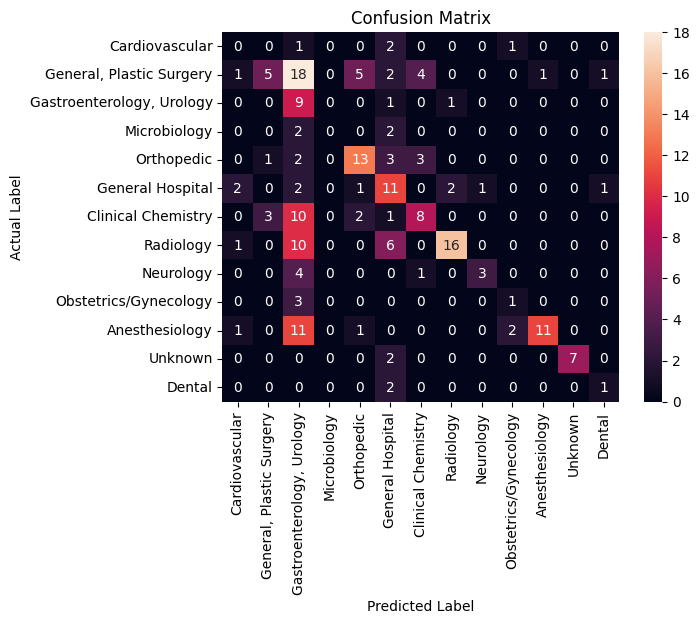

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', xticklabels= values_to_keep, yticklabels=values_to_keep)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

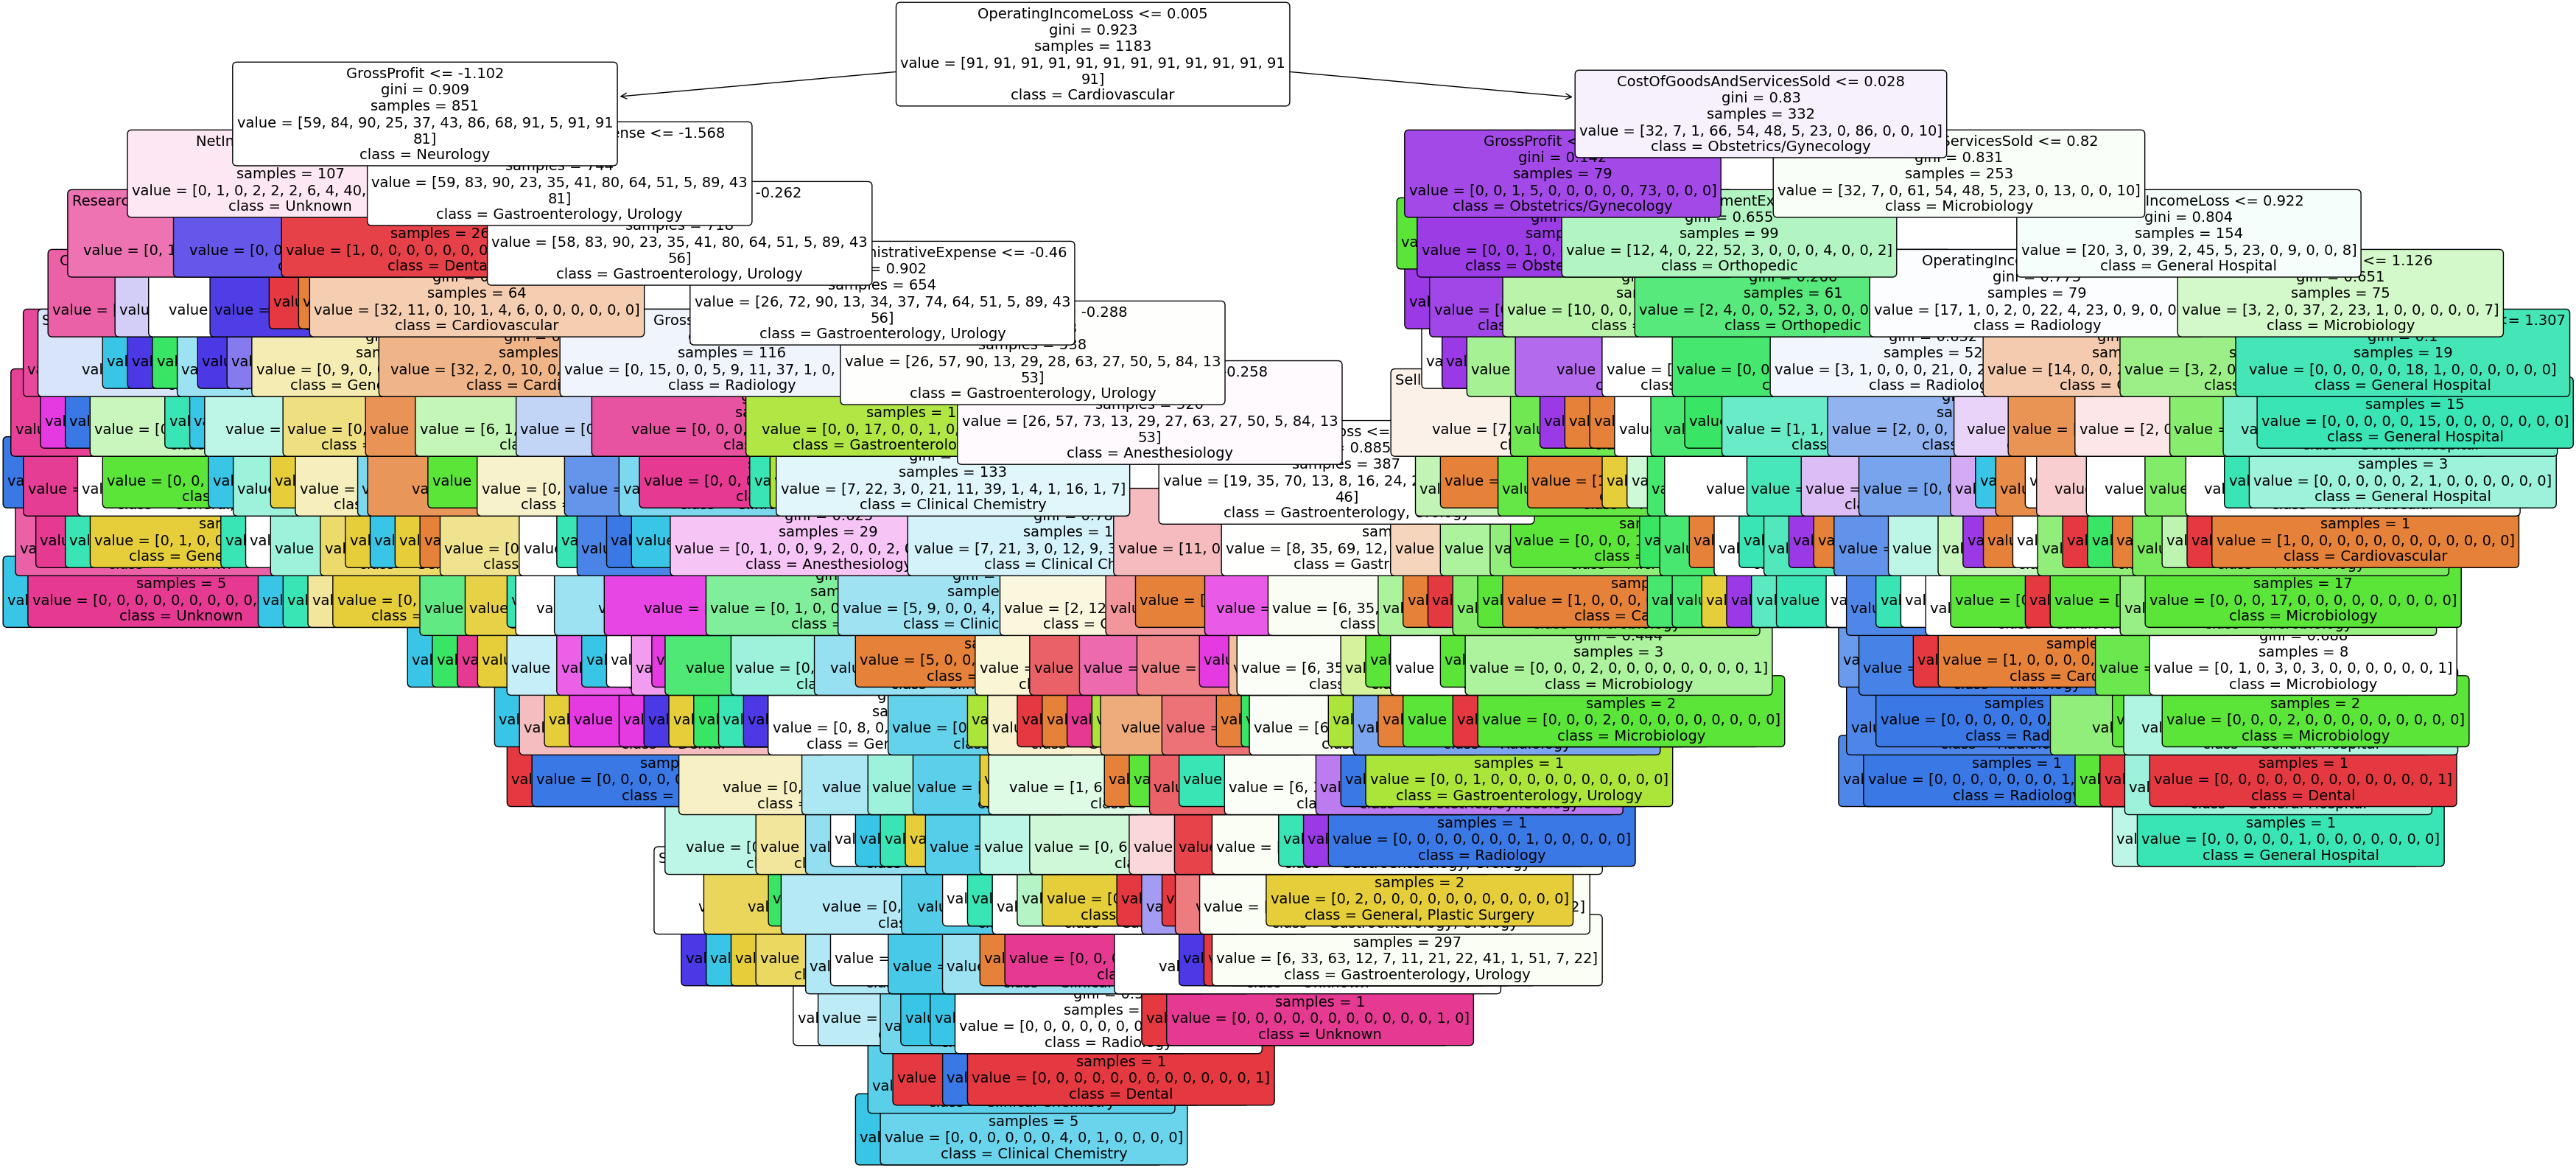

In [22]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(40, 20))
plot_tree(dt_classifier, feature_names=financial_columns, class_names= values_to_keep.values.tolist(), filled=True, rounded=True, fontsize=14)
plt.show()

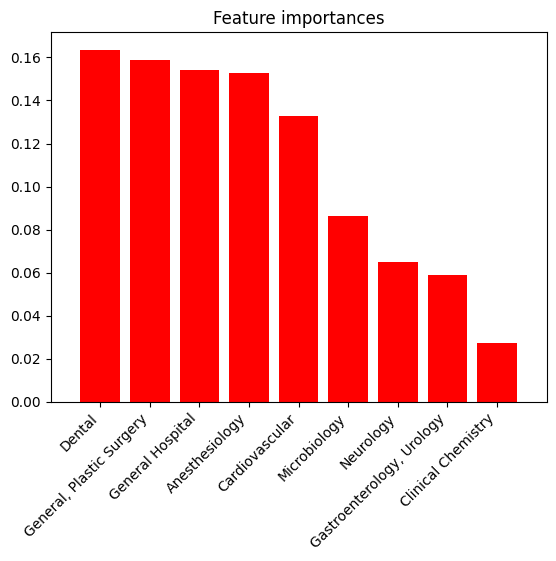

[0.15261375 0.13299341 0.02748275 0.16350441 0.0587797  0.15428078
 0.15893538 0.08640607 0.06500375]


In [23]:
feature_importances = dt_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names_sorted = [y.cat.categories[i] for i in indices]


plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names_sorted, rotation=45, ha= 'right')
plt.xlim([-1, X_train.shape[1]])
plt.show()

print(feature_importances)

## **Random Forest with SMOTE**

### **Applying SMOTE**

In [24]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE for class rebalancing
smote = SMOTE(k_neighbors= 3, random_state= 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### **Hyperparameter Tuning**

In [25]:
# Hyperparameter tuning 
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

### **Running Optimized Model**

In [26]:
# Implementing RF
rf_classifier = RandomForestClassifier(random_state=42, max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       n_estimators=best_params['n_estimators'])
rf_classifier.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_classifier.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf)

/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dsan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Results**

In [27]:
# Viewing results
print(rf_report)

                           precision    recall  f1-score   support

           Anesthesiology       0.00      0.00      0.00         4
           Cardiovascular       0.58      0.19      0.29        37
       Clinical Chemistry       0.11      0.73      0.20        11
                   Dental       0.00      0.00      0.00         4
Gastroenterology, Urology       0.83      0.68      0.75        22
         General Hospital       0.43      0.65      0.52        20
 General, Plastic Surgery       0.43      0.38      0.40        24
             Microbiology       0.78      0.55      0.64        33
                Neurology       0.75      0.38      0.50         8
    Obstetrics/Gynecology       0.50      0.50      0.50         4
               Orthopedic       0.85      0.42      0.56        26
                Radiology       0.88      0.78      0.82         9
                  Unknown       1.00      0.33      0.50         3

                 accuracy                           0.46    

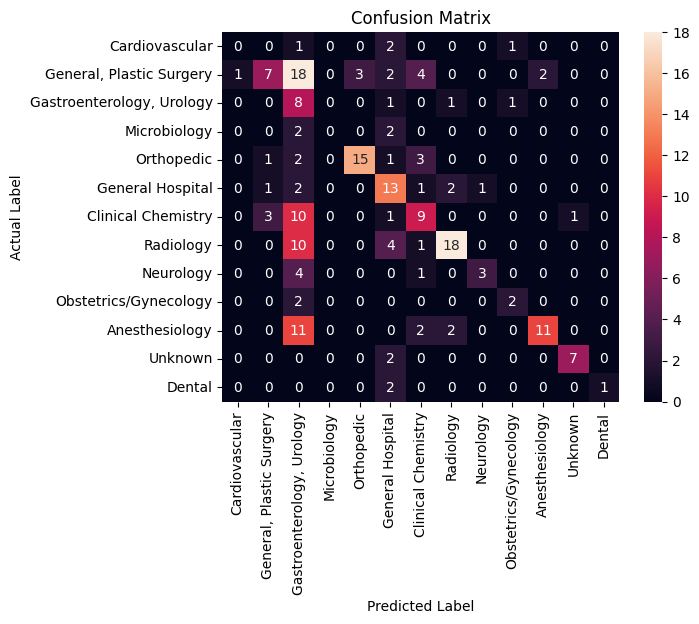

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', xticklabels= values_to_keep, yticklabels=values_to_keep)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

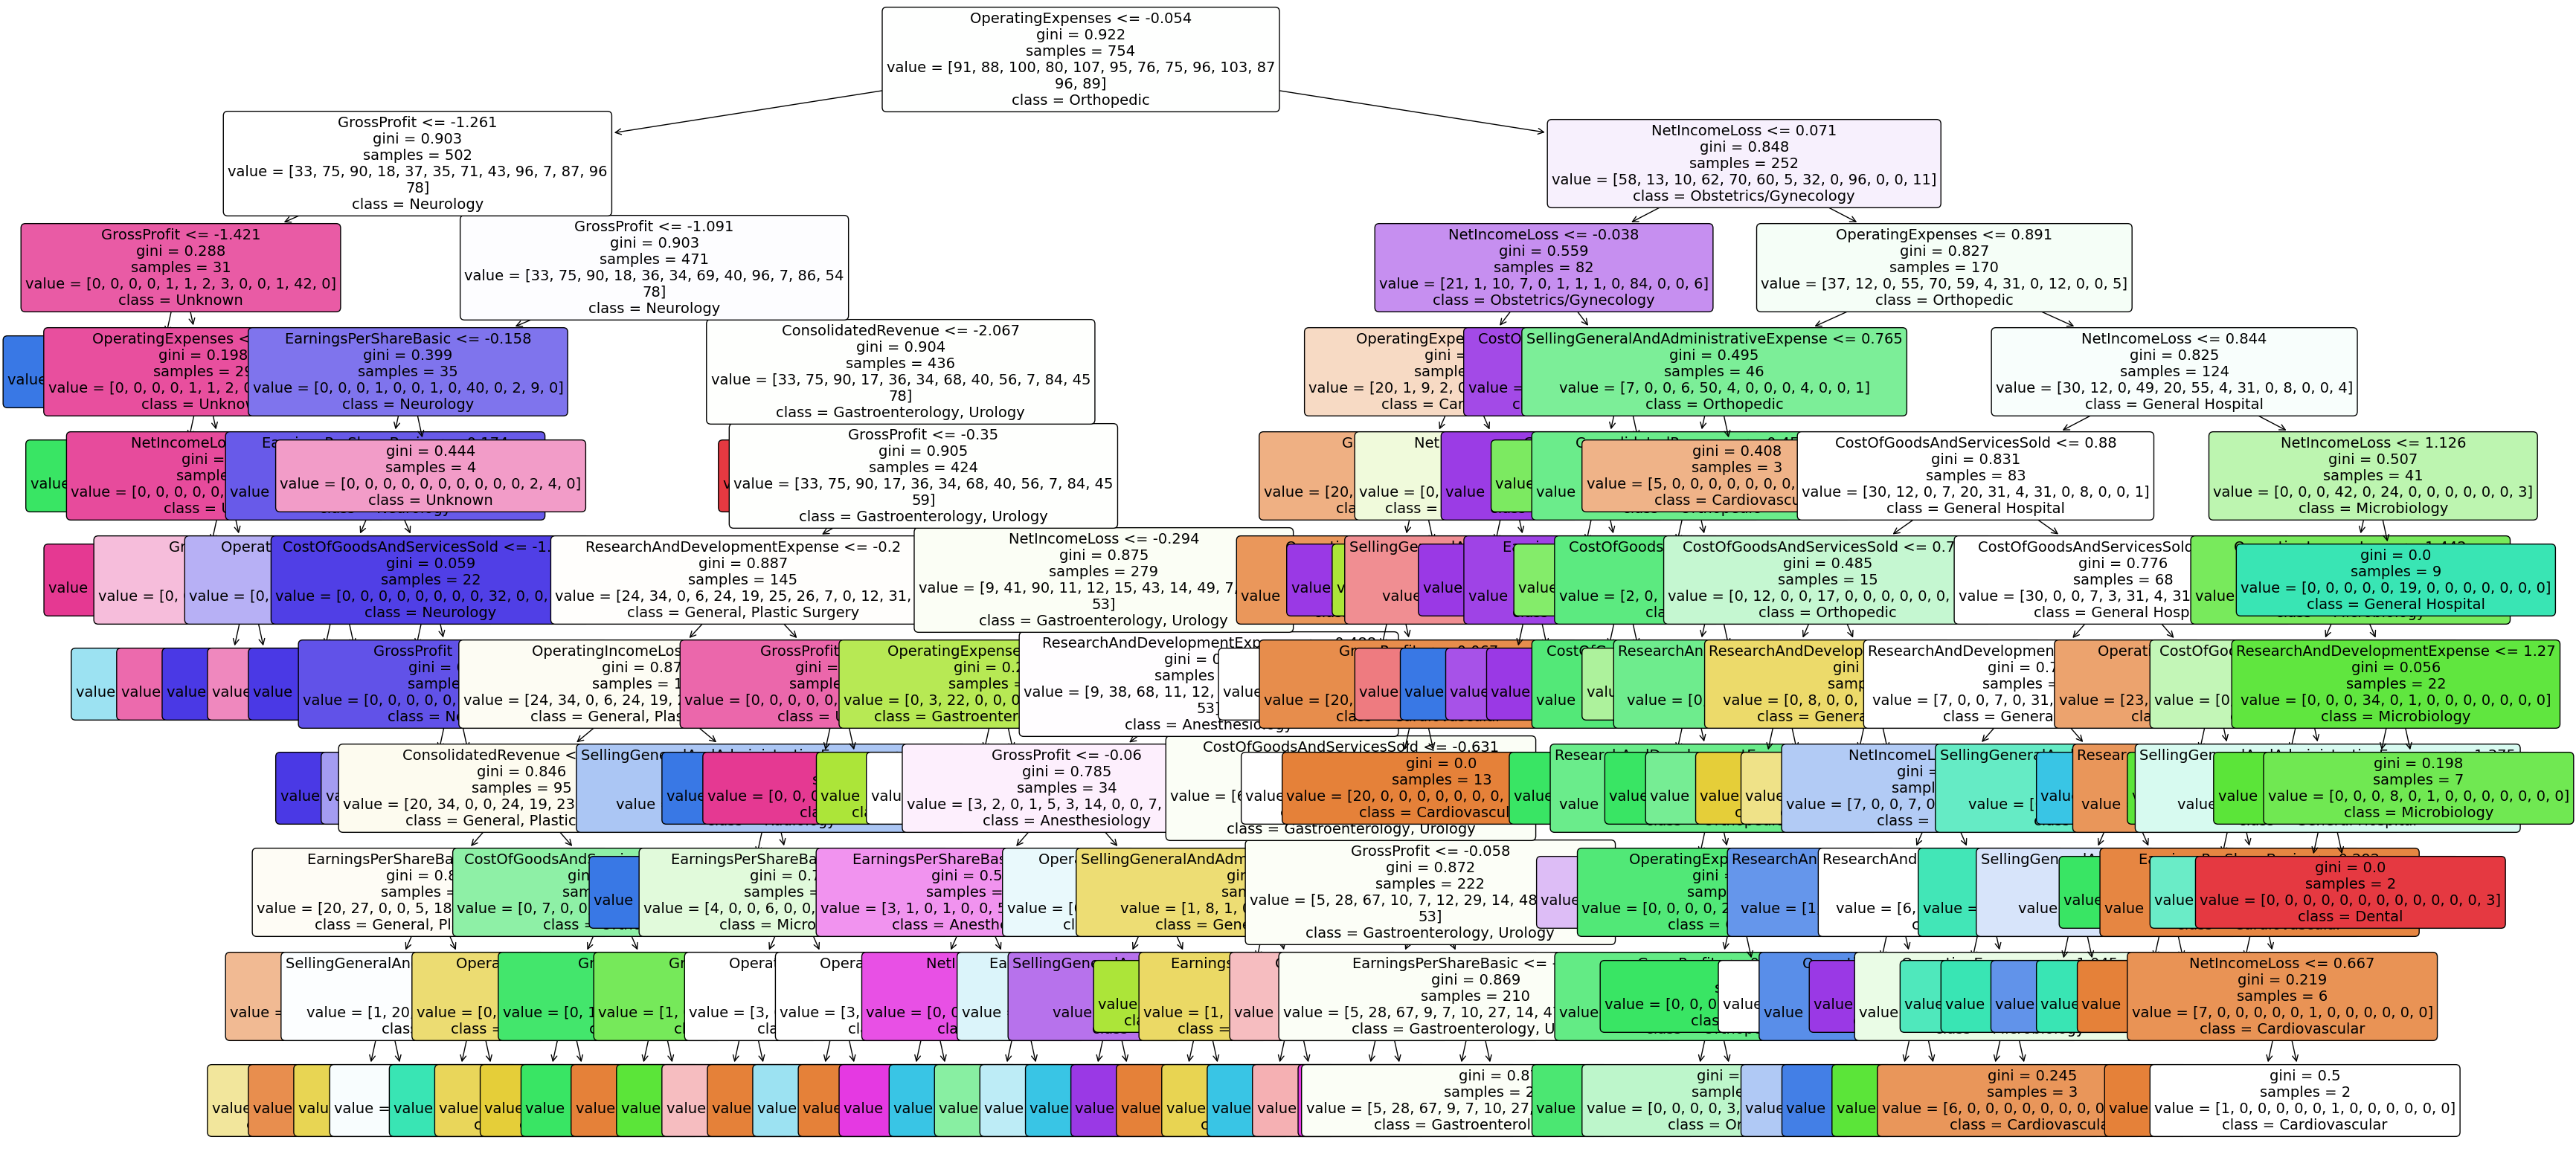

In [29]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(40, 20))
plot_tree(rf_classifier.estimators_[0], feature_names=financial_columns, class_names= values_to_keep.values.tolist(), filled=True, rounded=True, fontsize=14);

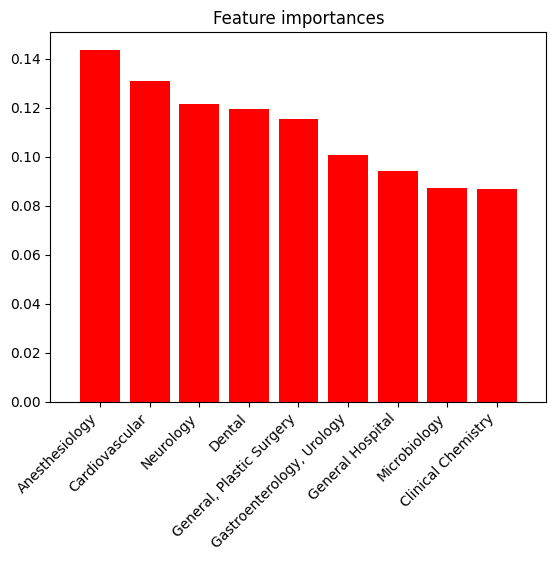

In [30]:
feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names_sorted = [y.cat.categories[i] for i in indices]


plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names_sorted, rotation=45, ha= 'right')
plt.xlim([-1, X_train.shape[1]])
plt.show()

# **Discussion and Conclusion**

## **Discussion of Results**

**Random Classifier:**
The random classifier continues to serve as a baseline, with an accuracy of only 8%, which is slightly lower than the previous analysis. This low performance is not surprising, as it randomly assigns categories without discerning patterns in the data. The confusion matrix shows very low precision and recall across all categories, reinforcing its ineffectiveness as a predictive tool.

**Basic Decision Tree Classifier:**
The basic decision tree classifier shows a marked improvement over the random classifier with an accuracy of 43%. However, its performance is varied across different categories. For instance, it performs reasonably well in 'Gastroenterology, Urology' and 'Radiology', but it shows no predictive capability in categories like 'Anesthesiology', 'Dental', and 'Unknown'. This suggests that while the decision tree can identify patterns in some categories, it struggles with others, likely due to the complexity or limited data in those areas.

**Basic Random Forest Classifier:**
The basic random forest classifier shows a further improvement in accuracy to 51%. It demonstrates high precision in categories like 'Microbiology', 'Radiology', and 'Orthopedic', indicating its ability to correctly identify these categories. However, its recall is still limited in several categories, suggesting challenges in identifying all relevant cases within those categories. The improvement over the basic decision tree indicates that the ensemble method helps in managing the complexity of the data better.

**Decision Tree with SMOTE:**
Implementing SMOTE with the decision tree model leads to an accuracy of 41%, which is surprisingly lower than its basic counterpart. While the precision and recall in 'Clinical Chemistry' and 'Gastroenterology, Urology' are commendable, the overall performance across categories is inconsistent. This might suggest that while SMOTE helps in balancing the classes, it may introduce some noise or overfitting issues in certain categories.

**Random Forest with SMOTE:**
The random forest model with SMOTE achieves an accuracy of 46%, which is slightly lower than the basic random forest model. This model demonstrates good precision in categories like 'Gastroenterology, Urology' and 'Radiology', and an improved recall in 'Clinical Chemistry'. However, the overall performance does not significantly outperform the basic random forest model, suggesting that while SMOTE has benefits for minority classes, it does not drastically enhance the model's overall predictive capabilities.

## **Conclusion:**

These results suggest that predicting FDA approval categories based solely on financial data remains a complex task. While machine learning models can provide some insights, their varied performance across different categories highlights the challenges in this domain.

The decision tree models, despite their simplicity, reveal some ability to categorize companies but are inconsistent across different categories. The random forest models, particularly with SMOTE, show a more balanced approach but still fall short in certain areas. The role of financial data in driving these categorizations remains somewhat opaque, as the models can predict categories to an extent but don't reveal why companies fall into these categories based on their financial strategies.

To gain deeper insights, integrating more detailed financial metrics and exploring other modeling approaches, such as regression analysis for continuous variables, might be necessary. This would help in understanding not just the categories companies fall into, but also the financial drivers behind these categorizations. The goal of future research should be to develop models that not only classify but also elucidate the relationship between financial health and FDA approval categories, providing a more holistic view of the biomedical sector.